<a href="https://colab.research.google.com/github/nataliaboaventura/customerservice/blob/main/CustomerService.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desenvolvimento de KPI’s do serviço de atendimento de uma empresa antifraude
*Por Natália Boaventura, este projeto foi desenvolvido no curso de Analise de dados - Escola DNC.*

**Objetivo do estudo:**
Este estudo tem como objetivo metrificar e identificar gargalos no processo de atendimento ao cliente, visando aprimorar a eficiência e qualidade do serviço.

**Descrição das bases utilizadas:**
As bases de dados utilizadas para este estudo foram obtidas da central de atendimento de uma empresa parceira da escola DNC. Elas são compostas por:

service – base de dados em xlsx contendo as informações dos acionamentos via e-mail; (https://docs.google.com/spreadsheets/d/e/2PACX-1vRc4sS3L_giFOxOlpxN-YkAhwx2fcaxYbo3p6DWoHxDLAYzMYOZko5gvVbPt2ejwA/pub?output=xlsx)

canais_digitais – base de dados em xlsx contendo as informações dos acionamentos via chatbot e whatsapp; (https://docs.google.com/spreadsheets/d/e/2PACX-1vROZSpSw23dER5fqelnvl0MY62nDC0oEP5P_obZ4bfjsmvOFH5kUd_oaqpzE94jtA/pub?output=xlsx)



**Abaixo está o dicionário dos dados com a descrição de cada variável coletada:**

**Número do caso** -	"Identificação do caso no sistema

**Status** -	"Status do caso na data de extração do relatório

**Tipo de registro do caso** -	"Canal de recebimento (Canais digitais = Wpp e Chat / Service = E-mail)

**Grupo**	 -	"Grupo no qual pertence aquele caso (Todos os casos enviados são do grupo ""Central de Relacionamento"")

**Proprietário do caso** -	"Atendente responsável pelo caso

**ID da conta**	 -	"Identificação da conta (Importante: No conjunto de caracteres de identificação, letras minúsculas e maiúsculas são consideradas diferentes no sistema)

**Plataforma** -	"Indica se o cliente possui ou não acesso a uma plataforma de serviços diferenciada

**Data/Hora de abertura** -	"Data e hora que o caso foi aberto no nosso sistema

**Data/Hora de fechamento** -	"Data e hora que o caso foi resolvido no nosso sistema (casos ainda em andamento não possuem esse dado)

**Motivo do caso** -	"Qual foi o motivo de acionamento

**Submotivo do Caso** -	"Alguns motivos possuem um submotivo para detalhar melhor

**Frente** -	"Espécie de classificação dos clientes"

**Importações**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

**Carregamento dos Datasets e limpeza dos dados de acionamento via e-mail**

In [ ]:
#Carregamento e visualização das primeiras 15 linhas da base de dados
service = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRc4sS3L_giFOxOlpxN-YkAhwx2fcaxYbo3p6DWoHxDLAYzMYOZko5gvVbPt2ejwA/pub?output=xlsx'
df_service = pd.read_excel(service)
df_service.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Painel_Power_BI_Final_Service_DNC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Filtrado por,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Mostrar: Todos os casos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Unidades: Horas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Grupo igual a Central de relacionamento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Número do caso,NaN,Status,Tipo de registro do caso,Grupo,Proprietário do caso,ID da conta,Plataforma,Data/Hora de abertura,Data/Hora de fechamento,Motivo do caso,Submotivo do Caso


In [ ]:
# analisando a head da planilha, é necessário remover as primeiras 9 linhas que não contêm dados relevantes
# o resultado é salvo na variável "service" para evitar sobrescrições
service = df_service.iloc[9:].copy()

# também é necessário remover as colunas vazias de índices 0, 2 e 12
columns_to_remove = [0, 2, 12]
service = service.drop(service.columns[columns_to_remove], axis=1)

# definindo a primeira linha de 'service' como o novo cabeçalho
new_header = service.iloc[0]  # Linha de índice 0 após a remoção das 9 iniciais
service = service[1:].copy()  # Remove a linha que foi utilizada como cabeçalho
service.columns = new_header  # Define o novo cabeçalho

# visualizando as primeiras linhas para conferir a remoção e ajustes
service.head()

9,Número do caso,Status,Tipo de registro do caso,Grupo,Proprietário do caso,ID da conta,Plataforma,Data/Hora de abertura,Data/Hora de fechamento,Motivo do caso
10,00052060,Finalizado,Service,Central de relacionamento,Proprietário1,0015a00002rAXyW,Sim,16/10/2023 17:36,17/10/2023 10:36,Motivo 1
11,00052061,Finalizado,Service,Central de relacionamento,Proprietário9,0010b00002RcdGt,NaN,16/10/2023 17:38,17/10/2023 10:05,Motivo 2
12,00052062,Finalizado,Service,Central de relacionamento,Proprietário1,0015a00002jXdJ6,NaN,16/10/2023 17:40,17/10/2023 10:43,Motivo 1
13,00052071,Finalizado,Service,Central de relacionamento,Proprietário4,0015a00002o9yoO,Sim,16/10/2023 17:52,25/10/2023 11:44,Motivo 3
14,00052078,Finalizado,Service,Central de relacionamento,Proprietário9,0010b00002RcdGt,NaN,16/10/2023 18:02,17/10/2023 10:11,Motivo 2


**Carregamento dos Datasets e limpeza dos dados de acionamento via chatbot e whatsapp**

In [ ]:
# Carregamento e visualização das primeiras 15 linhas da base de dados
canais_digitais = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vROZSpSw23dER5fqelnvl0MY62nDC0oEP5P_obZ4bfjsmvOFH5kUd_oaqpzE94jtA/pub?output=xlsx'
df_canais = pd.read_excel(canais_digitais)
df_canais.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Painel_Power_BI_Final_Canais_Digitais_DN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Filtrado por,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Mostrar: Todos os casos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Unidades: Horas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Tipo de registro do caso igual a Canais digitais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# analisando a head da planilha, é necessário remover as primeiras 10 linhas que não contêm dados relevantes
# o resultado é salvo na variável "canais" para evitar sobrescrições
canais = df_canais.iloc[10:]

# também é necessário remover as colunas vazias de índices 0 e 2
columns_to_remove = [0, 2]
canais = canais.drop(canais.columns[columns_to_remove], axis=1)

# definindo a primeira linha de 'canais' como o novo cabeçalho
new_header = canais.iloc[0]
canais = canais[1:]
canais.columns = new_header
canais = canais.reset_index(drop=True)
canais.head()

10,Número do caso,Status,Tipo de registro do caso,Grupo,Proprietário do caso,ID da conta,Plataforma,Data/Hora de abertura,Data/Hora de fechamento,Motivo Contato,Submotivo Contato
0,00156224,Resolvido,Canais digitais,NaN,Proprietário66,0015a000034CHCp,Sim,20/09/2024 11:13,20/09/2024 11:22,Motivo 65,Submotivo 1
1,00156216,Resolvido,Canais digitais,NaN,Proprietário66,001U5000001hpmj,NaN,20/09/2024 11:03,20/09/2024 11:14,Motivo 65,Submotivo 2
2,00156211,Resolvido,Canais digitais,NaN,Proprietário66,0015a00002wYv2V,Sim,20/09/2024 10:55,20/09/2024 11:11,Motivo 65,NaN
3,00156210,Em espera,Canais digitais,NaN,Proprietário2,0015a00002hEBgA,Sim,20/09/2024 10:52,NaN,Motivo 65,Submotivo 3
4,00156208,Resolvido,Canais digitais,NaN,Proprietário66,0015a00002nls6k,NaN,20/09/2024 10:48,20/09/2024 10:55,Motivo 66,Submotivo 4


### Conhecendo o Dataset Service


In [ ]:
#Visualizando as primeiras linhas
service.head()
service.shape

NameError: name 'service' is not defined

In [ ]:
#Identificando o tamanho da base de dados para conseguir metrificar se há dados faltantes
service.shape

(45200, 10)

In [ ]:
#Verificando os tipos de dados de cada coluna para alterar para o tipo de dados correto, caso necessário.
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 10 to 45209
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Número do caso            45200 non-null  object
 1   Status                    45200 non-null  object
 2   Tipo de registro do caso  45199 non-null  object
 3   Grupo                     45199 non-null  object
 4   Proprietário do caso      45199 non-null  object
 5   ID da conta               45199 non-null  object
 6   Plataforma                22919 non-null  object
 7   Data/Hora de abertura     45199 non-null  object
 8   Data/Hora de fechamento   44867 non-null  object
 9   Motivo do caso            45088 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


In [ ]:
#Explorando quais colunas possuem nulos para iniciar a limpeza dos dados
service.isnull().sum().sort_values(ascending=False).reset_index()


,9,0
0,Plataforma,22281
1,Data/Hora de fechamento,333
2,Motivo do caso,112
3,Tipo de registro do caso,1
4,Grupo,1
5,Proprietário do caso,1
6,ID da conta,1
7,Data/Hora de abertura,1
8,Número do caso,0
9,Status,0


## Explorando Dados Categóricos do Dataset Service

O objetivo dessa fase é analisar separadamente as informações contidas em cada coluna para explorar os dados para possíveis insights

In [ ]:
#Status

agrup_status = service.groupby(['Status']).size()
agrup_status.sort_values()

,0
Status,
45199,1
Novo,46
Em tratativa,56
Pendente,68
Em aberto,69
Em espera,93
Resolvido,132
Finalizado,44735


In [ ]:
#Fazendo uma pesquisa do registro 45199 para verificar o que há nessa linha
consulta = service.loc[45199]
consulta

,45199
9,
Número do caso,00156252
Status,Pendente
Tipo de registro do caso,Service
Grupo,Central de relacionamento
Proprietário do caso,Proprietário9
ID da conta,0015a00002qwo0p
Plataforma,NaN
Data/Hora de abertura,20/09/2024 11:47
Data/Hora de fechamento,NaN


In [ ]:
#Excluindo registro 45199 pois foi um possível erro de inserção de dado
service.drop(service.loc[service['Status'] == 45199].index, inplace=True)

In [ ]:
# Verifica se há linhas idênticas em 'service'
duplicate_rows = service[service.duplicated()]

# Se houver linhas duplicadas, imprime-as
if not duplicate_rows.empty:
  print("Linhas duplicadas encontradas em 'service':")
  print(duplicate_rows)
else:
  print("Não foram encontradas linhas duplicadas em 'service'.")

Não foram encontradas linhas duplicadas em 'services'.


## Padronização de valores da coluna Status para evitar duplicacidade de valores


In [ ]:
#Padronizando os valores Resolvido e Finalizado

service.loc[service['Status'] == 'Resolvido', 'Status'] = 'Finalizado'
agrup_status = service.groupby(['Status']).size()
agrup_status.sort_values()

,0
Status,
Novo,46
Em tratativa,56
Pendente,68
Em aberto,69
Em espera,93
Finalizado,44867


In [ ]:
# Filtrando os dados para obter apenas os não finalizados
nao_finalizado = service[service['Status'] != 'Finalizado']

In [ ]:
# Contagem de chamadas por status
contagem_status = nao_finalizado['Status'].value_counts()

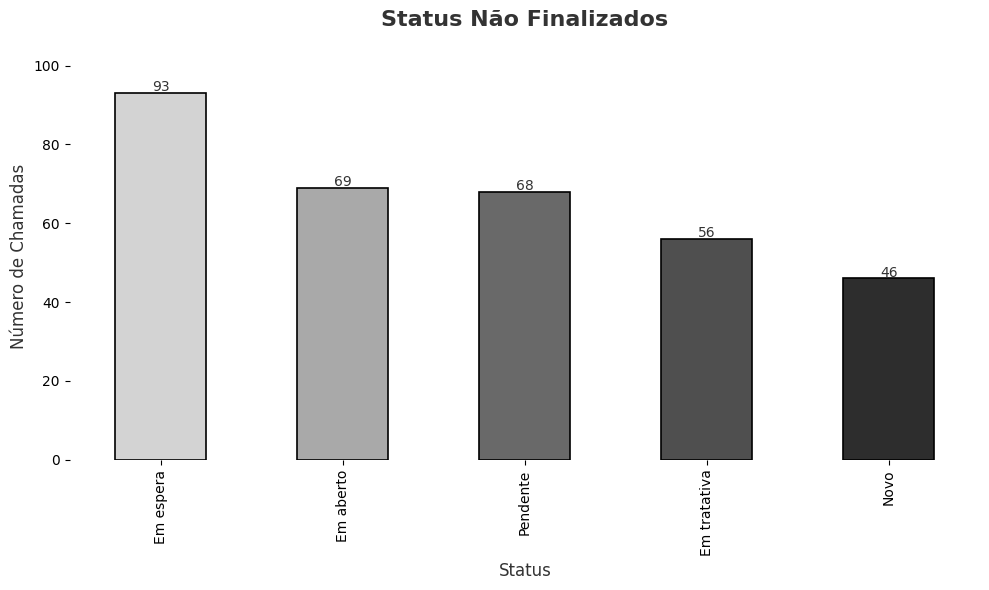

In [ ]:
# Gráfico de barras
colors = ['#D3D3D3', '#A9A9A9', '#696969', '#4F4F4F', '#2D2D2D']
plt.figure(figsize=(10, 6))
contagem_status.plot.bar(
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

plt.title('Status Não Finalizados', fontsize=16, fontweight='bold', color='#333333', pad=20)
plt.xlabel('Status', fontsize=12, color='#333333')
plt.ylabel('Número de Chamadas', fontsize=12, color='#333333')

# Ajuste o limite do eixo y com base na contagem de status
plt.ylim(0, contagem_status.max() + 10)

for index, value in enumerate(contagem_status):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10, color='#333333')

plt.box(False)
plt.tight_layout()
plt.show()

In [ ]:
# Quantificando os IDs da conta
agrup_conta = service.groupby(['ID da conta']).size()
agrup_conta

,0
ID da conta,
000000000000000,5992
0010b00002M5dj0,4
0010b00002MThkB,5
0010b00002MTsy7,3
0010b00002MTtto,3
...,...
001U500000BzZP7,1
001U500000C08mi,1
001U500000C2OfQ,1



ID DA CONTA 000000000000000

Quantidade bastante expressiva de cliente final que está entrando em contato diretamente com Central de Atendimento.

In [ ]:
# Clientes que possuem plataforma

agrup_plataforma = service.groupby(['Plataforma']).size()
agrup_plataforma

,0
Plataforma,
Sim,22919


In [ ]:
# prompt: agrupar por plataforma sim e diferente de sim

# Agrupando por plataforma e contando a quantidade de cada grupo
agrupamento_plataforma = service.groupby('Plataforma').size()
print(agrupamento_plataforma)

# Criando um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(8, 6))
agrupamento_plataforma.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribuição de Chamadas por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Quantidade de Chamadas')
plt.xticks(rotation=0)
plt.show()


NameError: name 'service' is not defined

In [ ]:
#Verificando os nulos da coluna plataforma

service['Plataforma'].isnull().sum()

22280

In [ ]:
#Substituindo Nulos pela palavra 'Não'

service['Plataforma'].fillna('Não', inplace = True)
agrup_plataforma = service.groupby(['Plataforma']).size()
agrup_plataforma

<ipython-input-20-ecd3867067f1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  services['Plataforma'].fillna('Não', inplace = True)


,0
Plataforma,
Não,22280
Sim,22919


In [ ]:
# Verificar se existe ID da conta = 000000000000000
# pode contar quantas vezes '000000000000000' aparece:
if 'ID da conta' in service.columns:
    count = (service['ID da conta'] == '000000000000000').sum()
    print(f"O ID '000000000000000' aparece {count} vezes no arquivo.")

O ID '000000000000000' aparece 5992 vezes no arquivo.


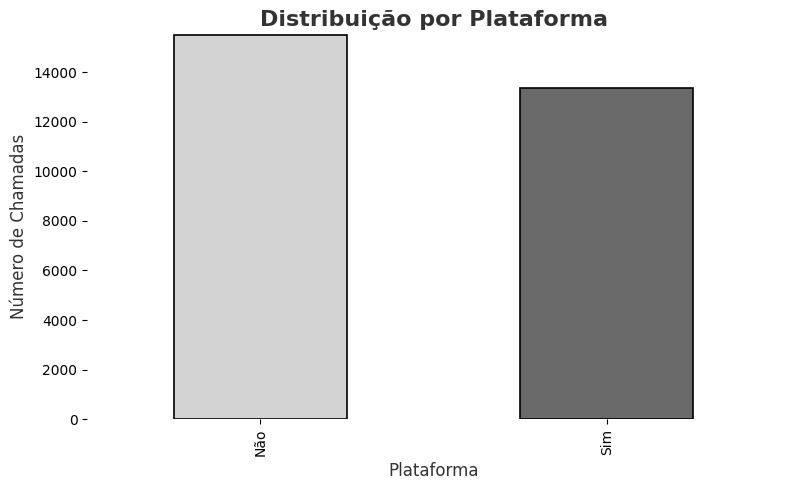

In [ ]:
colors = ['#D3D3D3', '#696969']
plt.figure(figsize=(8, 5))

agrup_plataforma.plot.bar(
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

plt.title('Distribuição por Plataforma', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Plataforma', fontsize=12, color='#333333')
plt.ylabel('Número de Chamadas', fontsize=12, color='#333333')

plt.ylim(0, agrup_plataforma.max() + 10)


plt.box(False)

plt.tight_layout()
plt.show()

In [ ]:
# Data/Hora de abertura

agrup_data_abertura = service.groupby(['Data/Hora de abertura']).size()
agrup_data_abertura

,0
Data/Hora de abertura,
01/01/2024 01:39,1
01/01/2024 04:36,1
01/01/2024 09:40,1
01/01/2024 09:46,1
01/01/2024 10:05,1
...,...
31/12/2023 15:43,1
31/12/2023 16:49,1
31/12/2023 17:04,1


In [ ]:
#Data/Hora de fechamento

agrup_data_fechamento = service.groupby(['Data/Hora de fechamento']).size()
agrup_data_fechamento

,0
Data/Hora de fechamento,
01/01/2024 11:01,1
01/02/2024 02:39,1
01/02/2024 03:28,1
01/02/2024 08:25,1
01/02/2024 08:55,1
...,...
31/10/2023 18:25,1
31/10/2023 18:27,1
31/10/2023 18:29,1


In [ ]:
#Substituindo valores nulos da coluna Data/Hora de fechamento

service['Data/Hora de fechamento'].fillna(' ', inplace = True)
service['Data/Hora de fechamento']

<ipython-input-24-f74129a7aa87>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  services['Data/Hora de fechamento'].fillna(' ', inplace = True)


,Data/Hora de fechamento
10,17/10/2023 10:36
11,17/10/2023 10:05
12,17/10/2023 10:43
13,25/10/2023 11:44
14,17/10/2023 10:11
...,...
45204,
45205,
45206,20/09/2024 11:57
45207,


##Descobrindo os Horários mais Requisitados

In [ ]:
#Descobrindo se há alguma relação no turno do dia vs. Chamadas

service['Data/Hora de abertura'] = pd.to_datetime(service['Data/Hora de abertura'])

#Extraindo a hora da coluna

service['Hora'] = service['Data/Hora de abertura'].dt.hour

#Contabilizando a ocorrencia de chamados por hora
chamadas_por_hora = service['Hora'].value_counts().sort_index()
chamadas_por_hora.sort_values()

<ipython-input-25-ed716e5f8183>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  services['Data/Hora de abertura'] = pd.to_datetime(services['Data/Hora de abertura'])


,count
Hora,
4,59
2,84
3,100
0,110
5,113
23,144
22,206
21,226
6,248


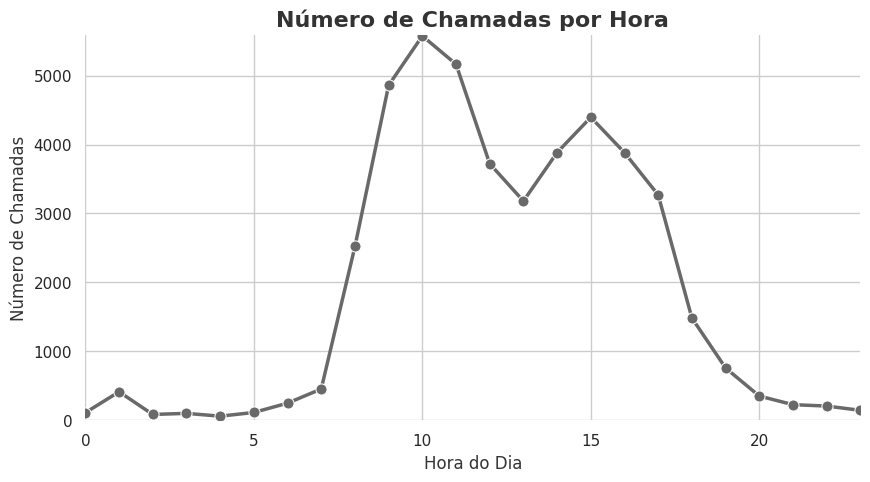

In [ ]:
#Construindo um gráfico dessa análise

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Gerando o gráfico de linha
sns.lineplot(
    x=chamadas_por_hora.index,
    y=chamadas_por_hora.values,
    marker='o',
    color='#696969',
    linewidth=2.5,
    markersize=8
)

# Adicionando título e rótulos
plt.title("Número de Chamadas por Hora", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Hora do Dia", fontsize=12, color='#333333')
plt.ylabel("Número de Chamadas", fontsize=12, color='#333333')

plt.xlim(chamadas_por_hora.index.min(), chamadas_por_hora.index.max())
plt.ylim(0, chamadas_por_hora.values.max() + 10)

plt.box(False)

plt.show()

Há dois horários de picos às 10:00 (turno da manhã) e às 15:00 (turno da tarde)

### Dias em que houveram mais aberturas de chamados

In [ ]:
#Descobrindo se há alguma relação no turno do dia vs. Chamadas

service['Data/Hora de abertura'] = pd.to_datetime(service['Data/Hora de abertura'])

#Extraindo a hora da coluna

service['Dia'] = service['Data/Hora de abertura'].dt.day

#Contabilizando a ocorrencia de chamados por hora
chamadas_por_dia = service['Dia'].value_counts().sort_index()
chamadas_por_dia.sort_values()

,count
Dia,
31,694
2,1048
30,1052
3,1079
25,1107
4,1195
28,1266
1,1304
11,1369


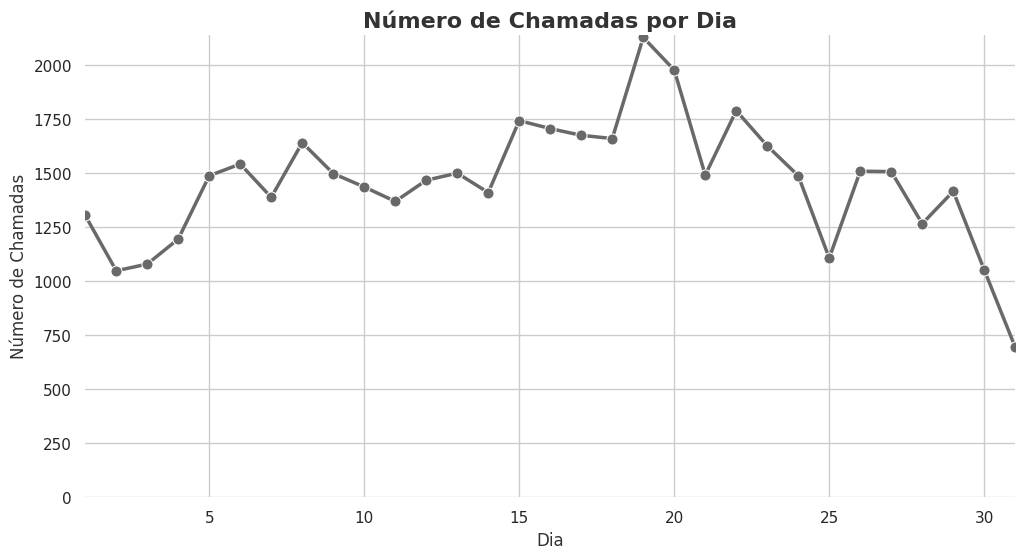

In [ ]:
#Construindo um gráfico dessa análise

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))


sns.lineplot(
    x=chamadas_por_dia.index,
    y=chamadas_por_dia.values,
    marker='o',
    color='#696969',
    linewidth=2.5,
    markersize=8
)


plt.title("Número de Chamadas por Dia", fontsize=16, fontweight='bold', color='#333333')
plt.xlabel("Dia", fontsize=12, color='#333333')
plt.ylabel("Número de Chamadas", fontsize=12, color='#333333')


plt.xlim(chamadas_por_dia.index.min(), chamadas_por_dia.index.max())
plt.ylim(0, chamadas_por_dia.values.max() + 10)


plt.box(False)
plt.show()

In [ ]:
service.isnull().sum().sort_values()

,0
9,
Número do caso,0
Status,0
Tipo de registro do caso,0
Grupo,0
Proprietário do caso,0
ID da conta,0
Plataforma,0
Data/Hora de abertura,0
Data/Hora de fechamento,0


## 03 - Explorando a Base de dados Canais Digitais

In [ ]:
#Exibindo as primeiras linhas

canais.head()

10,Número do caso,Status,Tipo de registro do caso,Grupo,Proprietário do caso,ID da conta,Plataforma,Data/Hora de abertura,Data/Hora de fechamento,Motivo Contato,Submotivo Contato
0,00156224,Resolvido,Canais digitais,NaN,Proprietário66,0015a000034CHCp,Sim,20/09/2024 11:13,20/09/2024 11:22,Motivo 65,Submotivo 1
1,00156216,Resolvido,Canais digitais,NaN,Proprietário66,001U5000001hpmj,NaN,20/09/2024 11:03,20/09/2024 11:14,Motivo 65,Submotivo 2
2,00156211,Resolvido,Canais digitais,NaN,Proprietário66,0015a00002wYv2V,Sim,20/09/2024 10:55,20/09/2024 11:11,Motivo 65,NaN
3,00156210,Em espera,Canais digitais,NaN,Proprietário2,0015a00002hEBgA,Sim,20/09/2024 10:52,NaN,Motivo 65,Submotivo 3
4,00156208,Resolvido,Canais digitais,NaN,Proprietário66,0015a00002nls6k,NaN,20/09/2024 10:48,20/09/2024 10:55,Motivo 66,Submotivo 4


## Conhecendo o Dataset Canais

In [ ]:
# Descobrindo o tamanho da base para metrificar se há nulos nas colunas

canais.shape

(28874, 11)

In [ ]:
# Verificando os dados e o tipo de dados de cada coluna

canais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28874 entries, 0 to 28873
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Número do caso            28874 non-null  object
 1   Status                    28874 non-null  object
 2   Tipo de registro do caso  28873 non-null  object
 3   Grupo                     1 non-null      object
 4   Proprietário do caso      28873 non-null  object
 5   ID da conta               28873 non-null  object
 6   Plataforma                13357 non-null  object
 7   Data/Hora de abertura     28873 non-null  object
 8   Data/Hora de fechamento   28691 non-null  object
 9   Motivo Contato            28740 non-null  object
 10  Submotivo Contato         11039 non-null  object
dtypes: object(11)
memory usage: 2.4+ MB


##### Não houve necessidade de modificação do tipo de dados, sendo assim, podemos seguir para a análise exploratória

In [ ]:
# Verificando os nulos de cada coluna

canais.isnull().sum().sort_values(ascending=False)

,0
10,
Grupo,28873
Submotivo Contato,17835
Plataforma,15517
Data/Hora de fechamento,183
Motivo Contato,134
Tipo de registro do caso,1
Proprietário do caso,1
ID da conta,1
Data/Hora de abertura,1


In [ ]:
#Substituindo valores nulos da coluna Data/Hora de fechamento

canais['Data/Hora de fechamento'].fillna(' ', inplace = True)
canais['Data/Hora de fechamento']

<ipython-input-21-70916e71c30e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  canais['Data/Hora de fechamento'].fillna(' ', inplace = True)


,Data/Hora de fechamento
0,20/09/2024 11:22
1,20/09/2024 11:14
2,20/09/2024 11:11
3,
4,20/09/2024 10:55
...,...
28869,2022-03-22 10:36:00
28870,2022-03-22 10:42:00
28871,2022-03-22 10:24:00
28872,2022-03-22 09:45:00


In [ ]:
#Substituindo Nulos pela palavra 'Não'

canais['Plataforma'].fillna('Não', inplace = True)
agrup_plataforma = canais.groupby(['Plataforma']).size()
agrup_plataforma

<ipython-input-22-88af2394fee5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  canais['Plataforma'].fillna('Não', inplace = True)


,0
Plataforma,
Não,15517
Sim,13357


In [ ]:
# Verifica se há linhas idênticas em 'canais'
duplicate_rows_canais = canais[canais.duplicated()]

# Se houver linhas duplicadas, imprime-as
if not duplicate_rows_canais.empty:
  print("Linhas duplicadas encontradas em 'canais':")
  print(duplicate_rows_canais)
else:
  print("Não foram encontradas linhas duplicadas em 'canais'.")

Não foram encontradas linhas duplicadas em 'canais'.


In [ ]:
canais.head(20)

10,Número do caso,Status,Tipo de registro do caso,Grupo,Proprietário do caso,ID da conta,Plataforma,Data/Hora de abertura,Data/Hora de fechamento,Motivo Contato,Submotivo Contato
0,00156224,Resolvido,Canais digitais,NaN,Proprietário66,0015a000034CHCp,Sim,20/09/2024 11:13,20/09/2024 11:22,Motivo 65,Submotivo 1
1,00156216,Resolvido,Canais digitais,NaN,Proprietário66,001U5000001hpmj,Não,20/09/2024 11:03,20/09/2024 11:14,Motivo 65,Submotivo 2
2,00156211,Resolvido,Canais digitais,NaN,Proprietário66,0015a00002wYv2V,Sim,20/09/2024 10:55,20/09/2024 11:11,Motivo 65,NaN
3,00156210,Em espera,Canais digitais,NaN,Proprietário2,0015a00002hEBgA,Sim,20/09/2024 10:52,,Motivo 65,Submotivo 3
4,00156208,Resolvido,Canais digitais,NaN,Proprietário66,0015a00002nls6k,Não,20/09/2024 10:48,20/09/2024 10:55,Motivo 66,Submotivo 4
5,00156206,Resolvido,Canais digitais,NaN,Proprietário66,000000000000000,Não,20/09/2024 10:48,20/09/2024 11:00,Motivo 67,NaN
6,00156204,Resolvido,Canais digitais,NaN,Proprietário66,0015a00003KtKbm,Não,20/09/2024 10:46,20/09/2024 10:57,Motivo 66,NaN
7,00156198,Resolvido,Canais digitais,NaN,Proprietário66,0015a00003BJ1Yp,Sim,20/09/2024 10:39,20/09/2024 10:47,Motivo 66,NaN
8,00156188,Resolvido,Canais digitais,NaN,Proprietário66,0015a00002o8eQR,Não,20/09/2024 10:28,20/09/2024 10:33,Motivo 68,Submotivo 5
9,00156187,Resolvido,Canais digitais,NaN,Proprietário66,0015a00002xRfYb,Não,20/09/2024 10:25,20/09/2024 10:35,Motivo 67,NaN


In [ ]:
# Descobrindo o motivo do contato

agrup_motivo_contato = canais.groupby(['Motivo Contato']).size()
agrup_motivo_contato.sort_values()

,0
Motivo Contato,
Motivo 83,7
Motivo 84,8
Motivo 80,11
Motivo 31,14
Motivo 79,15
Motivo 82,42
Motivo 81,52
Motivo 77,91
Motivo 78,143


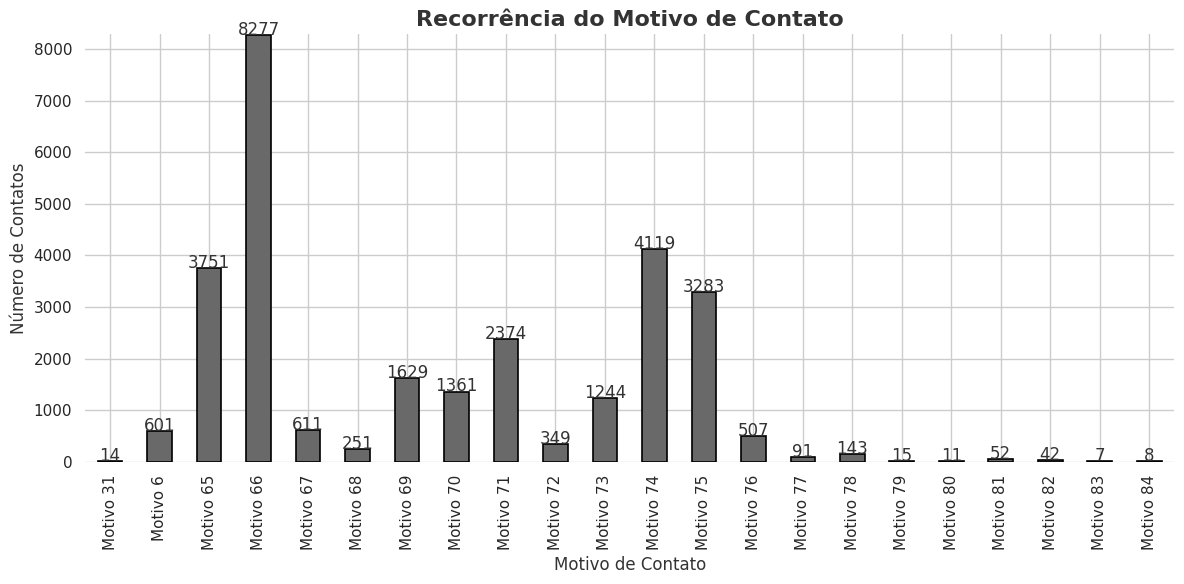

In [ ]:
#Exibindo os dados do motivo de contato

plt.figure(figsize=(12, 6))
agrup_motivo_contato.plot.bar(
    color='#696969',
    edgecolor='black',
    linewidth=1.2
)

plt.title('Recorrência do Motivo de Contato', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Motivo de Contato', fontsize=12, color='#333333')
plt.ylabel('Número de Contatos', fontsize=12, color='#333333')


plt.ylim(0, agrup_motivo_contato.max() + 10)


for index, value in enumerate(agrup_motivo_contato):
    plt.text(index, value + 1.3, str(value), ha='center', fontsize=12, color='#333333')


plt.box(False)


plt.tight_layout()
plt.show()

##### Motivo 66 foi mais acionado, seguido pelo 74.

In [ ]:
#Verificando se há valores nulos na coluna Submotivo de Contato
canais['Submotivo Contato'].isna().sum()

17835

In [ ]:
#Substituindo os valores faltantes por nulos para não prejudicar a análise

canais['Submotivo Contato'].fillna('', inplace=True)

<ipython-input-40-daa361a6762e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  canais['Submotivo Contato'].fillna('', inplace=True)


In [ ]:
agrup_submotivo_contato = canais.groupby(['Submotivo Contato']).size()
agrup_submotivo_contato.sort_values()

,0
Submotivo Contato,
Submotivo 32,1
Submotivo 77,1
Submotivo 75,1
Submotivo 78,1
Submotivo 59,1
...,...
Submotivo 6,659
Submotivo 4,902
Submotivo 2,1134


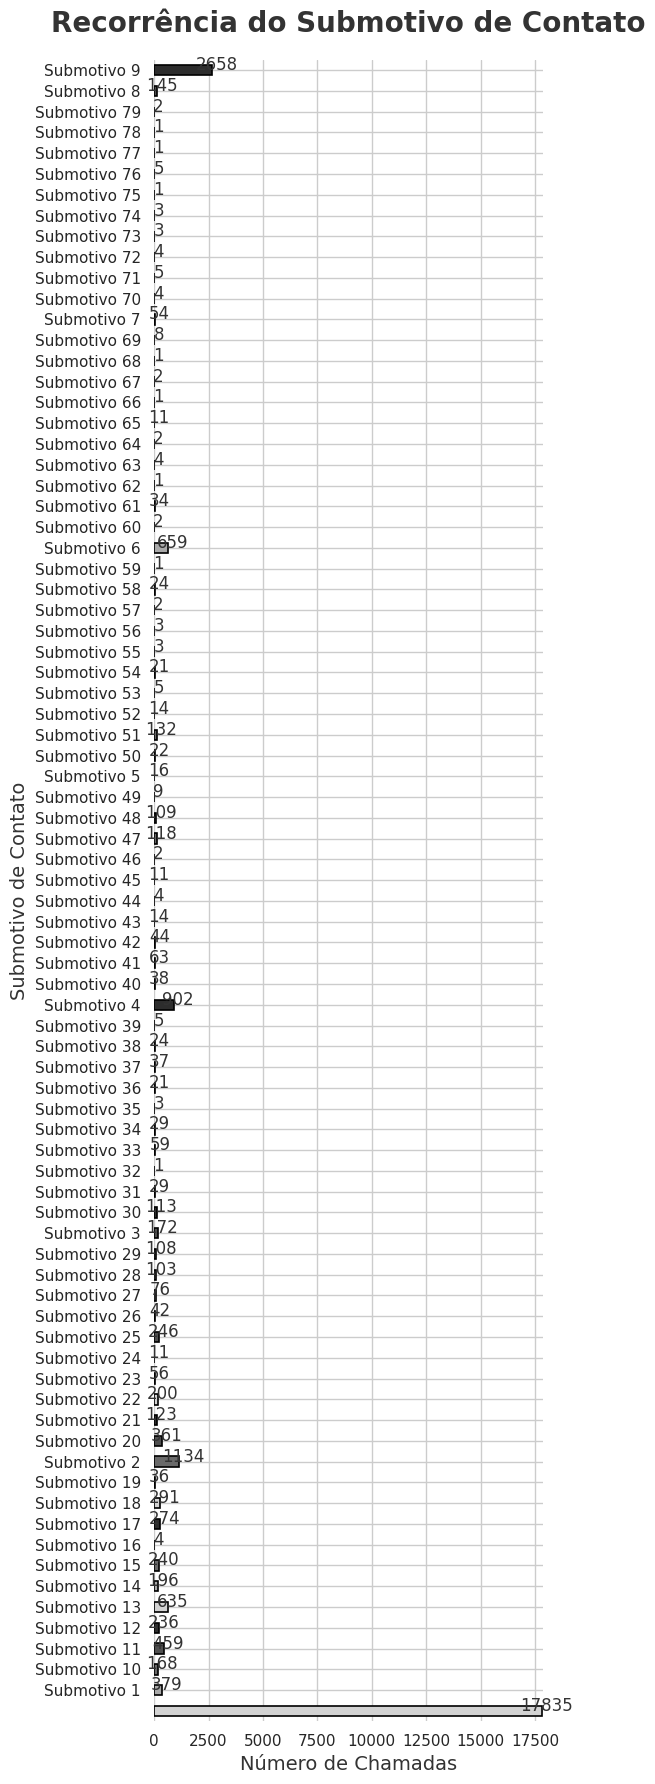

In [ ]:
#Exibindo os dados do submotivo de contato

colors = ['#D3D3D3', '#A9A9A9', '#696969', '#4F4F4F', '#2D2D2D']

plt.figure(figsize=(6, 18))

agrup_submotivo_contato.plot.barh(
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

plt.title('Recorrência do Submotivo de Contato', fontsize=20, fontweight='bold', color='#333333', pad=20)
plt.xlabel('Número de Chamadas', fontsize=14, color='#333333')
plt.ylabel('Submotivo de Contato', fontsize=14, color='#333333')

plt.xlim(0, agrup_submotivo_contato.max() + 10)

for index, value in enumerate(agrup_submotivo_contato):
    plt.text(value + 200, index, str(value), ha='center', fontsize=12, color='#333333')

plt.box(False)
plt.tight_layout()
plt.show()

## Download dos datasets editados

In [ ]:
from google.colab import files

# Baixar o arquivo 'service'
service.to_excel('service_limpo.xlsx', index=False)
files.download('service_limpo.xlsx')

# Baixar o arquivo 'canais'
canais.to_excel('canais_limpo.xlsx', index=False)
files.download('canais_limpo.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>